### Whickham Data Set Investigation. 

<br>

#### General Setup.
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [2]:
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

<br>

#### Loading the data.
___

In [3]:
smoking = pd.read_csv('../Data/whickham.csv')
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   object
 2   age      1314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


In [4]:
smoking.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [5]:
# Separate smoker column in its own data frame
pd.DataFrame(smoking.smoker.value_counts())

,smoker
No,732
Yes,582


In [6]:
# Separate outcome column into its own data frame
pd.DataFrame(smoking.outcome.value_counts())

,outcome
Alive,945
Dead,369


In [7]:
# Check proportions of the outcome column
pd.DataFrame(smoking.outcome.value_counts(normalize=True))

,outcome
Alive,0.719178
Dead,0.280822


In [8]:
# Check the outcome proportion by smoker column
bysmoker = smoking.groupby('smoker').outcome.value_counts(normalize=True)
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [9]:
bysmoker.index

MultiIndex([( 'No', 'Alive'),
            ( 'No',  'Dead'),
            ('Yes', 'Alive'),
            ('Yes',  'Dead')],
           names=['smoker', 'outcome'])

In [10]:
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


From the above table it appears that smoking outcome is better than for non-smokers. However, we didn't take into account the age column of the women. To fix this, we can separate the data for age groups.

In [11]:
smoking['age_group'] = pd.cut(smoking.age,[0,30, 40, 50, 65, 80], 
                              labels=['0-30', '30-40', '40-50', '50-65', '65-80'])
smoking['age_group'].head()


0     0-30
1     0-30
2    65-80
3    65-80
4    50-65
Name: age_group, dtype: category
Categories (5, object): ['0-30' < '30-40' < '40-50' < '50-65' < '65-80']

In [12]:
byage = smoking.groupby(['age_group', 'smoker']).outcome.value_counts(normalize=True)
byage.unstack().drop('Dead', axis=1)

outcome              Alive
age_group smoker          
0-30      No      0.981818
          Yes     0.975610
30-40     No      0.955224
          Yes     0.940678
40-50     No      0.867470
          Yes     0.828125
50-65     No      0.676471
          Yes     0.609756
65-80     No      0.160256
          Yes     0.146341

This data set is a clear example of Simpson's paradox where a tred appears in the several groups but it disappears or even reverses when these groups are combined. 

<br>

#### Data Visualization.
___

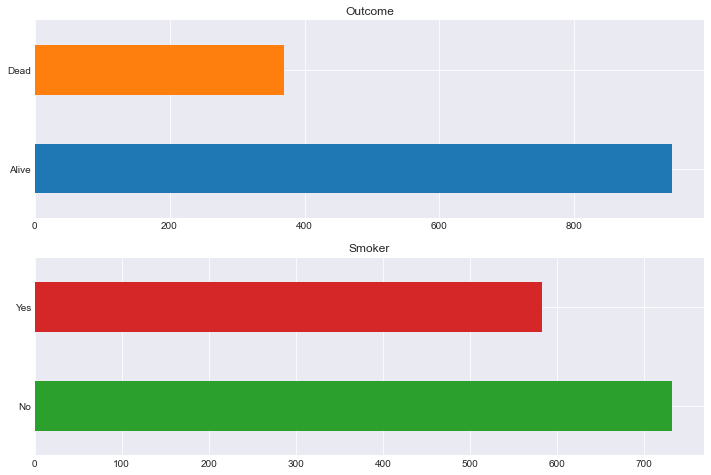

In [13]:
# Plot the outcome and smoker data.
fig, [ax1, ax2] = plt.subplots(2)
smoking.outcome.value_counts().plot.barh(ax=ax1, color=['C0', 'C1'])
smoking.smoker.value_counts().plot.barh(ax=ax2, color=['C2', 'C3'])

ax1.set_title('Outcome')
ax2.set_title('Smoker');

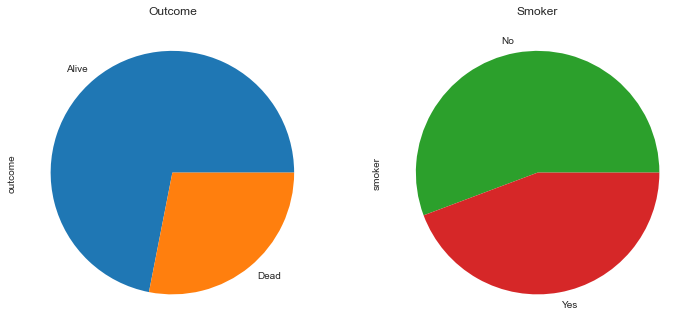

In [14]:
# The same with pie charts
fig, [ax1, ax2] = plt.subplots(1,2)
smoking.outcome.value_counts().plot.pie(ax=ax1, colors=['C0', 'C1'])
smoking.smoker.value_counts().plot.pie(ax=ax2, colors=['C2', 'C3'])

ax1.set_title('Outcome')
ax2.set_title('Smoker');

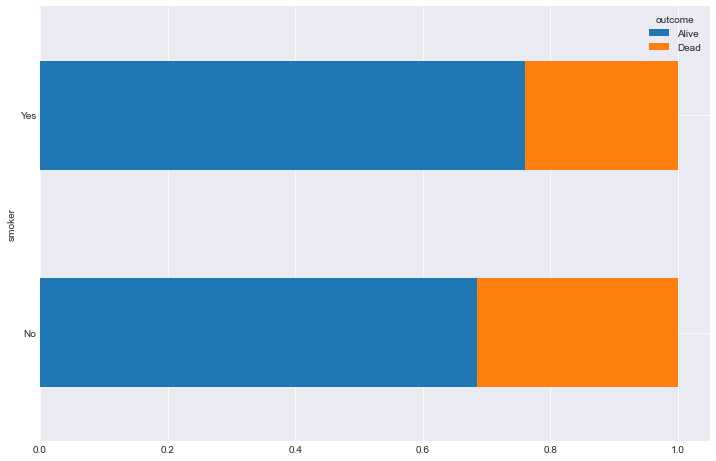

In [15]:
# Outcome vs Smoker plot
bysmoker.unstack().plot.barh(stacked=True);

In [16]:
# Remove the Dead column
byage2 = byage.unstack().drop('Dead', axis=1).unstack()
byage2

outcome       Alive          
smoker           No       Yes
age_group                    
0-30       0.981818  0.975610
30-40      0.955224  0.940678
40-50      0.867470  0.828125
50-65      0.676471  0.609756
65-80      0.160256  0.146341

In [17]:
# Rename the columns
byage2.columns = ['No', 'Yes']
byage2.columns.name = 'smoker'
byage2

smoker,No,Yes
age_group,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-50,0.867470,0.828125
50-65,0.676471,0.609756
65-80,0.160256,0.146341


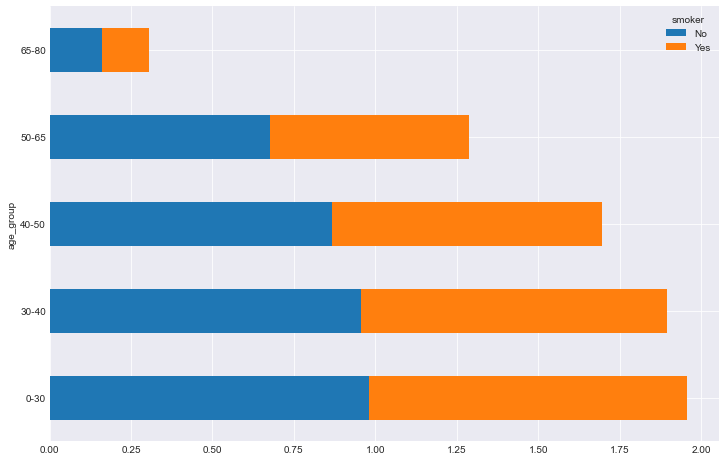

In [18]:
# Smoker data vs age groups
byage2.plot.barh(stacked=True);

<br>

___

#### End.